#Exploratory analysis 
##part II

Seems like there is a difference between popularity of certain business categories across the cities. This might indicate that there are a some demographic characteristics which describes the difference and hence gives a chance of developing the predictive model. <br>
Just to double check, let us see what is going on with some other group of categories. 

In [1]:
#general
import numpy as np
import scipy
from matplotlib import pyplot as plt
%pylab inline
import pandas as pd
import MySQLdb
import os
import sys
sys.setrecursionlimit(3000)

Populating the interactive namespace from numpy and matplotlib


## Get the data

In [3]:
con=MySQLdb.connect(user=user, passwd=passwd, db=dbname, host=host)
df = pd.read_sql("SELECT * FROM business WHERE longitude <= -65 AND longitude >=-127.77 AND latitude >=24.52 AND latitude<=49.38", con)
print "data loaded"

data loaded


/Users/Lexa/anaconda/lib/python2.7/site-packages/pandas/io/sql.py:1474: Warning: Truncated incorrect DOUBLE value: 'longitude'
  cur.execute(*args)
/Users/Lexa/anaconda/lib/python2.7/site-packages/pandas/io/sql.py:1474: Warning: Truncated incorrect DOUBLE value: '"Scottsdale'
  cur.execute(*args)


Let us remove Canada from the dataset. 

In [5]:
states = ['AZ', 'CA', 'IL', 'MA', 'MN', 'NC', 'NV', 'OR', 'PA', 'SC', 'WA', 'WI']

In [6]:
df2 = df.loc[df['state'].isin(states)]
df2.head(5)

,Unnamed: 0,X,categories,city,full_address,latitude,longitude,name,open,review_count,stars,state,type,zipcode
0,1,0,Doctors,Phoenix,"Phoenix, AZ 85018",33.499313,-111.983758,"Eric Goldberg, MD",True,9,3.5,AZ,business,85018
1,2,1,Health & Medical,Phoenix,"Phoenix, AZ 85018",33.499313,-111.983758,"Eric Goldberg, MD",True,9,3.5,AZ,business,85018
2,3,5488,Sandwiches,Phoenix,"Phoenix, AZ 85004",33.479542,-112.073418,Domino's Pizza,True,11,3.0,AZ,business,85004
3,4,5489,Pizza,Phoenix,"Phoenix, AZ 85004",33.479542,-112.073418,Domino's Pizza,True,11,3.0,AZ,business,85004
4,5,5490,Chicken Wings,Phoenix,"Phoenix, AZ 85004",33.479542,-112.073418,Domino's Pizza,True,11,3.0,AZ,business,85004


Prepare labels for ploting.

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['nice_cat'] = le.fit_transform(df2.categories)
df2.head(5)

/Users/Lexa/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:198: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))
/Users/Lexa/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Unnamed: 0,X,categories,city,full_address,latitude,longitude,name,open,review_count,stars,state,type,zipcode,nice_cat
0,1,0,Doctors,Phoenix,"Phoenix, AZ 85018",33.499313,-111.983758,"Eric Goldberg, MD",True,9,3.5,AZ,business,85018,215
1,2,1,Health & Medical,Phoenix,"Phoenix, AZ 85018",33.499313,-111.983758,"Eric Goldberg, MD",True,9,3.5,AZ,business,85018,327
2,3,5488,Sandwiches,Phoenix,"Phoenix, AZ 85004",33.479542,-112.073418,Domino's Pizza,True,11,3.0,AZ,business,85004,606
3,4,5489,Pizza,Phoenix,"Phoenix, AZ 85004",33.479542,-112.073418,Domino's Pizza,True,11,3.0,AZ,business,85004,537
4,5,5490,Chicken Wings,Phoenix,"Phoenix, AZ 85004",33.479542,-112.073418,Domino's Pizza,True,11,3.0,AZ,business,85004,143


I would like to see a difference between bike and motorbike users. Both require a fair weather, but, in general, they appeal to the completely different demographic group. <br>
This is common sense variation, the one that is apparent to any person who belongs to one of the groups, bikers or motorbikers and might show me is there an underlying factor that determines the difference. 

In [9]:
cat = ['Bike Repair/Maintenance','Bike Rentals', 'Mountain Biking', 
        'Cycling Classes','Motorcycle Repair','Motorcycle Dealers','Motorcycle Gear',
        'Motorcycle Rental','Bike Sharing']  

In [10]:
dfcat = df2.loc[df2['categories'].isin(cat)]
dfcat.head(5)

,Unnamed: 0,X,categories,city,full_address,latitude,longitude,name,open,review_count,stars,state,type,zipcode,nice_cat
1260,1261,6746,Bike Repair/Maintenance,Phoenix,"Phoenix, AZ 85014",33.523154,-112.064602,"SUN Cyclery, Inc.",True,42,4.5,AZ,business,85014,80
3137,3138,8623,Motorcycle Repair,Phoenix,"Phoenix, AZ 85022",33.606168,-112.036047,Ramjet Racing Performance Cycles,True,6,4.0,AZ,business,85022,460
3139,3140,8625,Motorcycle Dealers,Phoenix,"Phoenix, AZ 85022",33.606168,-112.036047,Ramjet Racing Performance Cycles,True,6,4.0,AZ,business,85022,457
3298,3299,8784,Motorcycle Repair,Phoenix,"Phoenix, AZ 85022",33.606862,-112.036898,Cycle Gear,True,9,3.0,AZ,business,85022,460
3299,3300,8785,Motorcycle Dealers,Phoenix,"Phoenix, AZ 85022",33.606862,-112.036898,Cycle Gear,True,9,3.0,AZ,business,85022,457


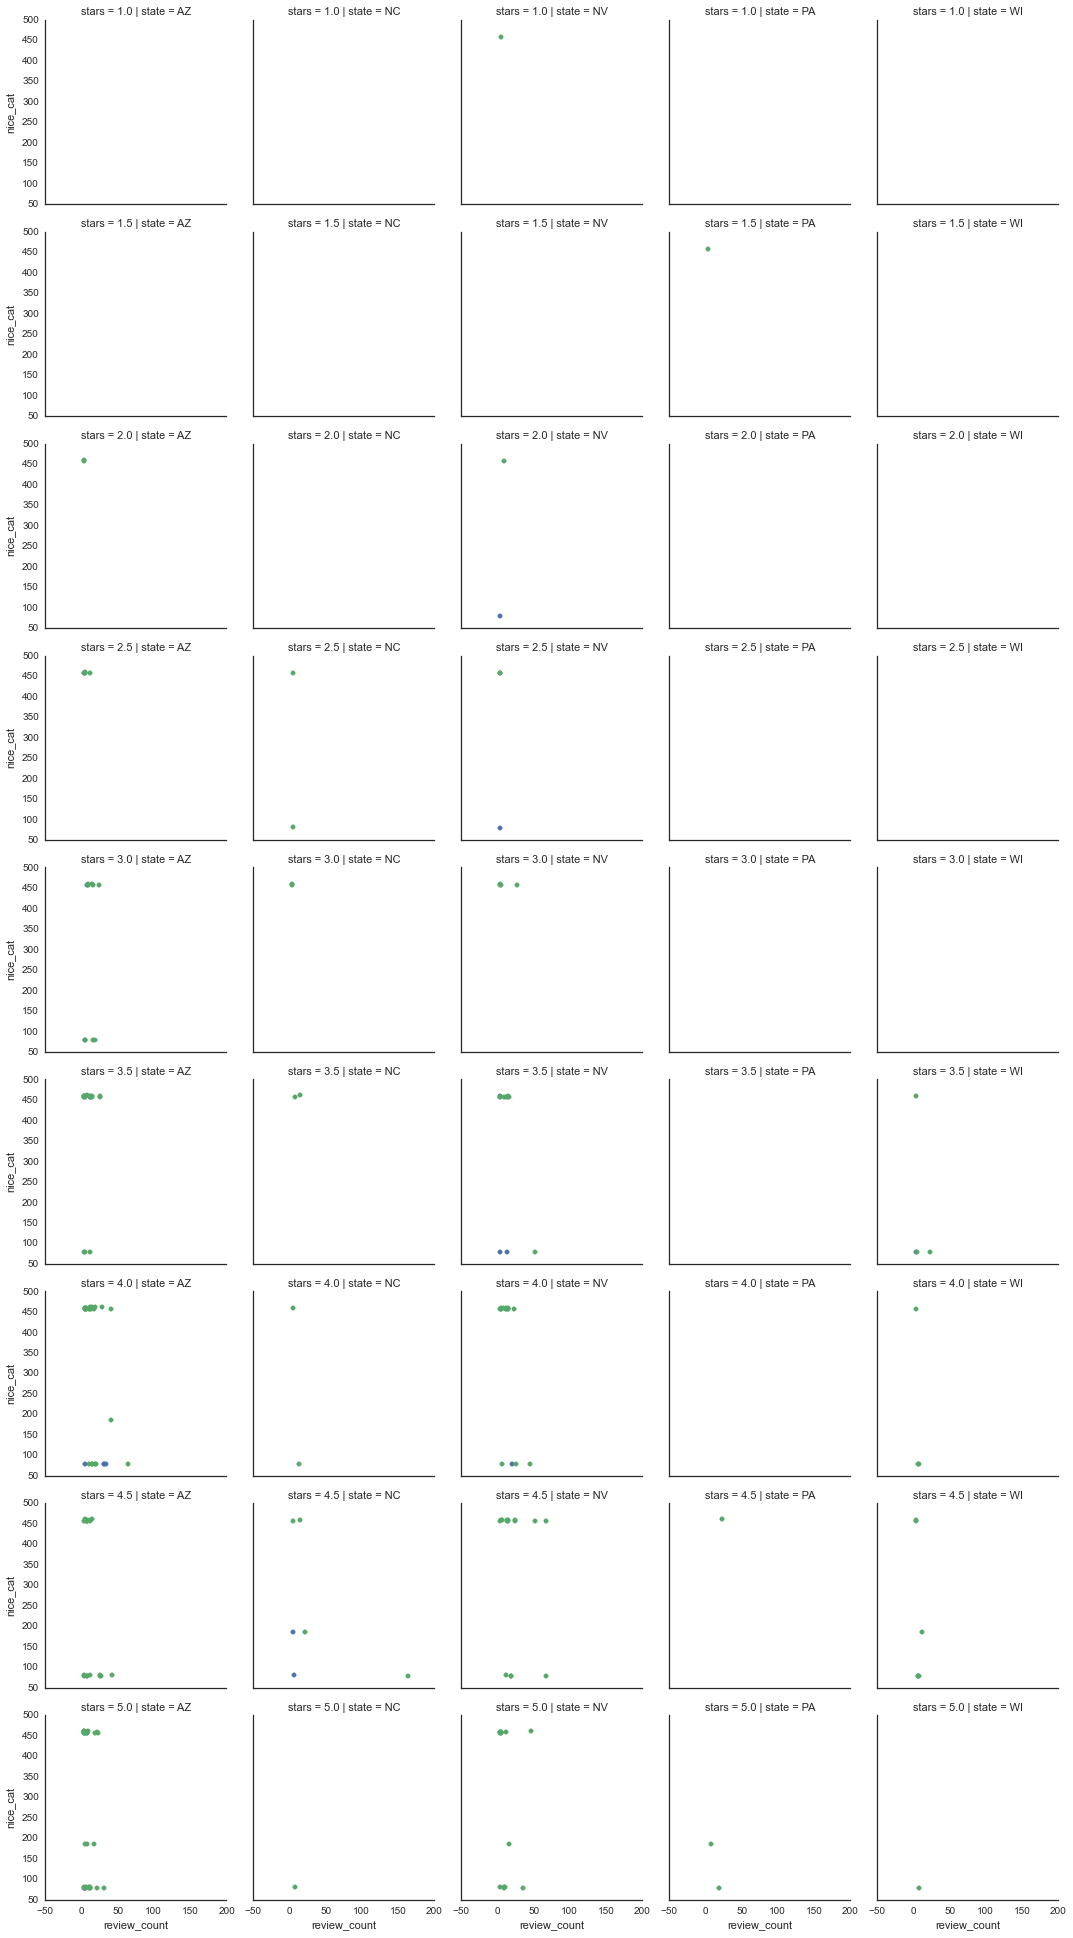

In [12]:
import matplotlib as mpl
import seaborn as sns
sns.set(style="white")
np.random.seed(sum(map(ord, "axis_grids")))
tips = dfcat #sns.load_dataset("dfcat2")
g = sns.FacetGrid(tips, col="state", row="stars", hue="open")
g.map(plt.scatter, "review_count", "nice_cat");


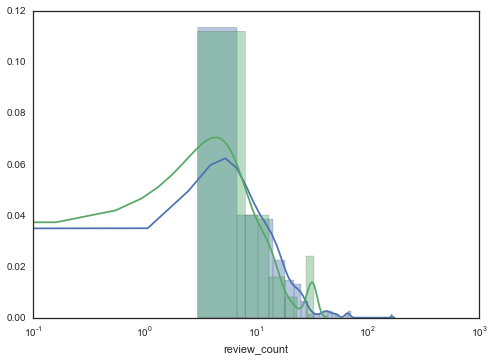

In [13]:
for open in dfcat.open.unique():
    grid=sns.distplot(dfcat[dfcat.open == open].review_count)
    grid.set(xscale="log")

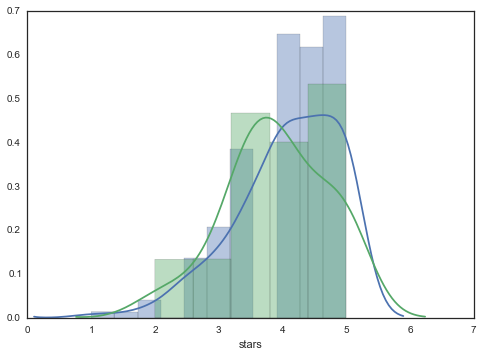

In [14]:
for open in dfcat.open.unique():
    sns.distplot(dfcat[dfcat.open == open].stars)

In [27]:
dfcat.nice_cat.unique()

array([ 81, 466, 463,  80, 467, 189, 464,  82, 465])

In [28]:
le.inverse_transform(dfcat.nice_cat.unique())

array(['Bike Repair/Maintenance', 'Motorcycle Repair',
       'Motorcycle Dealers', 'Bike Rentals', 'Mountain Biking',
       'Cycling Classes', 'Motorcycle Gear', 'Bike Sharing',
       'Motorcycle Rental'], dtype=object)

Hmm, seems like there is a visible correlation between term bike and motorcycle. Not surprising since many motorcyclists call their machines bikes instead of the motorbike. <br>
Let us see what happens if I narrow the categories so that only clearly unrelated categories are shown. 

In [21]:
cat2=['Motorcycle Gear','Mountain Biking']
dfcat2 = df2.loc[df['categories'].isin(cat2)]

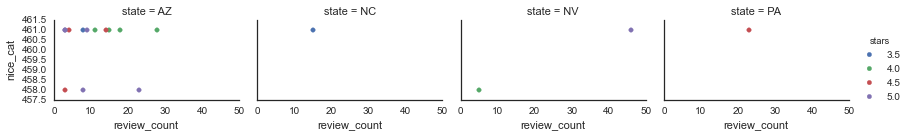

In [22]:
np.random.seed(sum(map(ord, "axis_grids")))
tips = dfcat2 #sns.load_dataset("dfcat2")
g = sns.FacetGrid(tips, col="state", hue="stars", size =2, aspect =1.5)
(g.map(plt.scatter, "review_count", "nice_cat")
     .add_legend(title="stars"))

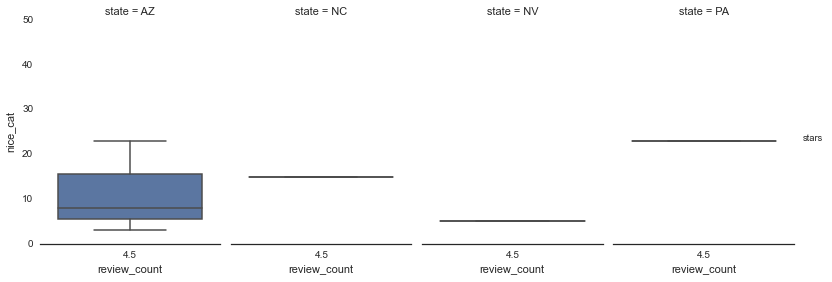

In [23]:
g = sns.FacetGrid(tips, col="state", size=4, aspect=.7)
(g.map(sns.boxplot, "review_count", "nice_cat", "stars")
   .despine(left=True)
   .add_legend(title="stars"))  

In [24]:
le.inverse_transform(dfcat2.nice_cat.unique())

array(['Mountain Biking', 'Motorcycle Gear'], dtype=object)

In [25]:
dfcat2.nice_cat.unique()

array([461, 458])

This seems like a path worth checking.